In [12]:
%reset -f

In [13]:
import numpy as np
import pandas as pd
import linearsolve as ls
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('classic')
%matplotlib inline

In [15]:
# Model parameters
parameters=pd.Series(dtype='float64')
parameters['β']=0.98 # discount rate : standard
parameters['γ']=2 # risk aversion : standard
parameters['η']=0.83 # Elasticity of substitution (tradable vs nontradable) : conservative (Bianchi,2011)
parameters['ξ']=1.5 # Elasticity of substitution (domestic tradable vs import) : standard 
parameters['σ']=6 # Elasticity of substitution (differentiated varieties) : standard
parameters['ν']=0.02 # bond adjustment cost : target 10% of GDP in ss
#parameters['P_T']=1 # tradable price index (numeraire)
parameters['P_TI']=1# import price index (exogenous numeraire) 
parameters['ω']=0.5 # weight on tradables : target 50% tradable share in consumption (Lombardo and Ravenna, 2012)
parameters['L']=1 # labor supply

parameters['k']=1/1.67+parameters['σ']-1  # shape parameter of Pareto : target 1.67 log US plant sales sd
parameters['a_min']=1 # lower bound of Pareto

parameters['μ']=0.6 # foreign input share of export fixed cost (Chaney 2016, 0.5~0.7)
parameters['F_x']=0.005 # export fixed cost : target 21% exporting firms in US
parameters['F_e']=1 # entry cost
parameters['ψ']=0.025 # probability of firm exit : US data, 10 percent job destruction per year)
parameters['κ']=1 # development of financial market (benchmark=1)
parameters['τ']=1.3 # iceberg trade cost : standard (Obstfeld and Rogoff, 2001)

parameters['Ε']=1 # Nominal exchange rate
parameters['P_star']=1 # foreign price index
parameters['w_star']=10 # foreign wage : arbitrary
parameters['r_star']=0.04 # foreign bond return : standard
parameters['A_star']=1 # foreign technology
#parameters['P_T_star']=1 # foreign tradable price index
#parameters['P_TI_star']=5 # foreign imported tradable price index
#parameters['E_star']=200 # foreign consumption expenditure

parameters['ρ_A']=0.906 # technology AR(1) coefficient (BKK, 1992)
parameters['σ_A']=0.00852 # technology standard deviation (BKK, 1992)
parameters['ρ_P_star']=0.906 # technology AR(1) coefficient (BKK, 1992)
parameters['σ_P_star']=0.00852 # technology standard deviation (BKK, 1992)
parameters['ρ_A_star']=0.906 # technology AR(1) coefficient (BKK, 1992)
parameters['σ_A_star']=0.00852 # technology standard deviation (BKK, 1992)

parameters['Y_N']=10 # nontradable endowment :arbitrary
parameters['q_f_res']=5 # foreign demand
parameters['q_f_res_star']=5  #q_f_res=(parameters.P_star**(parameters.σ-1))*parameters.q_f_res
# parameters['w']=5 # wage
# parameters['M_d']=1
parameters['k2']=1/1.67+parameters['σ']-1 +10 # shape parameter of Pareto : target 0.11 log US plant sales sd
parameters['F_x2']=0.0175

In [16]:
θ=(parameters.k/(parameters.k-(parameters.σ-1)))**((1)/(parameters.σ-1))
θ2=((parameters.k2)/((parameters.k2)-(parameters.σ-1)))**((1)/(parameters.σ-1))
θ2
parameters['k']
1/(parameters.k-6+1)
1/(parameters.k2-6+1)


0.0943502824858757

In [17]:
def G1(m):
    return 1-(((1*(parameters.σ-1))/(1.751347*parameters.τ*parameters.σ))**parameters.k)*(((parameters.σ/parameters.q_f_res)*(((1-parameters.μ)*1.751347+(parameters.μ)*parameters.w_star)*parameters.F_x))**(parameters.k/(1-parameters.σ)))*((1/m)**(parameters.k/(1-parameters.σ)))

def G2(m):
    return 1-(((1*(parameters.σ-1))/(1.049546*parameters.τ*parameters.σ))**parameters.k2)*(((parameters.σ/parameters.q_f_res)*(((1-parameters.μ)*1.049546+(parameters.μ)*parameters.w_star)*parameters.F_x2))**(parameters.k2/(1-parameters.σ)))*((1/m)**(parameters.k2/(1-parameters.σ)))

def d1(m):
    return (((θ**(parameters.σ-1))/m)-1)*((1-parameters.μ)*1.751347+parameters.μ*parameters.w_star)*parameters.F_x

def d2(m):
    return (((θ2**(parameters.σ-1))/m)-1)*((1-parameters.μ)*1.049546+parameters.μ*parameters.w_star)*parameters.F_x2

In [18]:
def f(a):
    return d1(a)*(1-G1(a))
def f2(a):
    return d2(a)*(1-G2(a))

f(0.0001)

0.013673473150638705

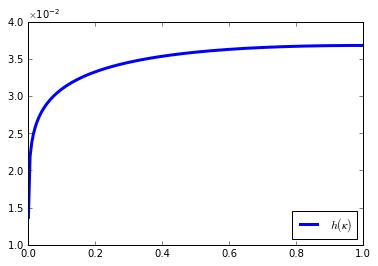

In [19]:
x = np.linspace(0.0001, 1, 200)
y = f(x)
y2=f2(x)

plt.plot(x, y, linewidth=3, color='blue', linestyle='solid', alpha=1, label='$h(κ)$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(loc='lower right')
plt.savefig('h_baseline.png')



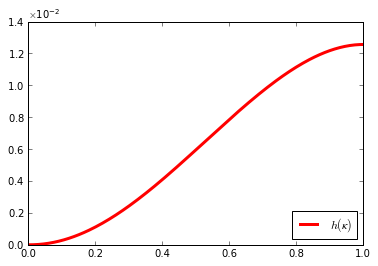

In [20]:
plt.plot(x, y2, linewidth=3, color='red', linestyle='solid', alpha=1, label='$h(κ)$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.legend(loc='lower right')
plt.savefig('h_sd.png')

In [95]:
def r(a):
    return a**(parameters.k/(parameters.σ-1)) 

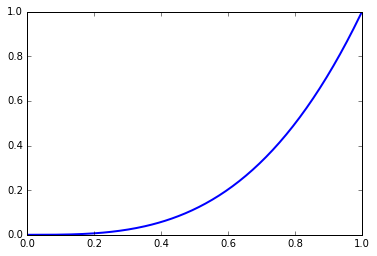

In [28]:
x = np.linspace(0.00001, 1, 200)
y = r(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

In [33]:
def abar(a):
    return a**(1/(1-parameters.σ)) 

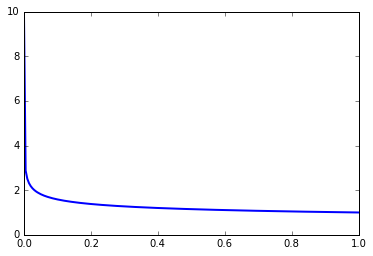

In [34]:
x = np.linspace(0.00001, 1, 200)
y = abar(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

In [140]:
def G(k):
    return 1-(1/(k**(1/(1-parameters.σ))))**6

def G2(k):
    return 1-(1/(k**(1/(1-parameters.σ))))**12

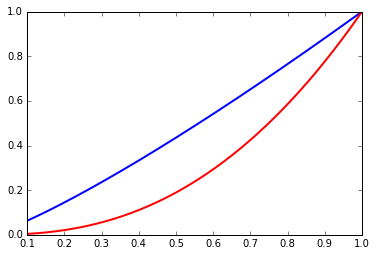

In [141]:
x = np.linspace(0.1, 1, 200)
y = 1-G(x)
y2= 1-G2(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, y2, 'r-', linewidth=2)
plt.show()

In [96]:
def d(a):
    return (θ**(parameters.σ-1))/a 

def d2(a):
    return (θ2**(parameters.σ-1))/a

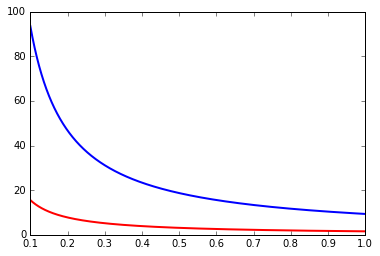

In [107]:
x = np.linspace(0.1, 1, 20000)
y = d(x)
y2= d2(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, y2, 'r-', linewidth=2)
plt.show()